In [1]:
import numpy as np
import librosa

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
seaborn.set(style = 'ticks')

import IPython.display

# Load wave

In [4]:
!pwd

/Users/williamz/Python/Instrument Recog/Expirement


In [3]:
audio_path = '../Sound/violin-test.wav'

y, sr = librosa.load(audio_path,sr = 32000)
y.size/32000

IOError: [Errno 2] No such file or directory: '/Users/williamz/Python/Instrument Recog/Sound/violin-test.wav'

In [94]:
IPython.display.Audio(data=y ,rate = sr)

# Mel spectrogram

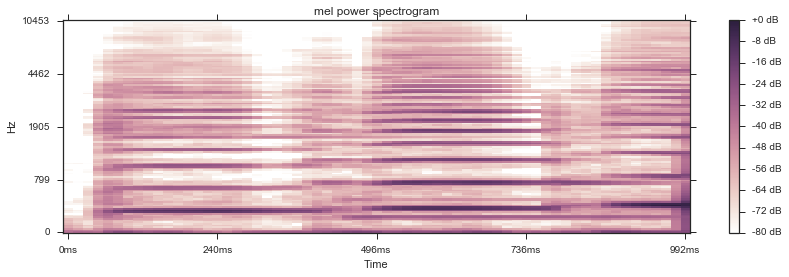

In [104]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr,n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [105]:
log_S.shape

(128, 63)

# MFCC & $\Delta$ MFCC

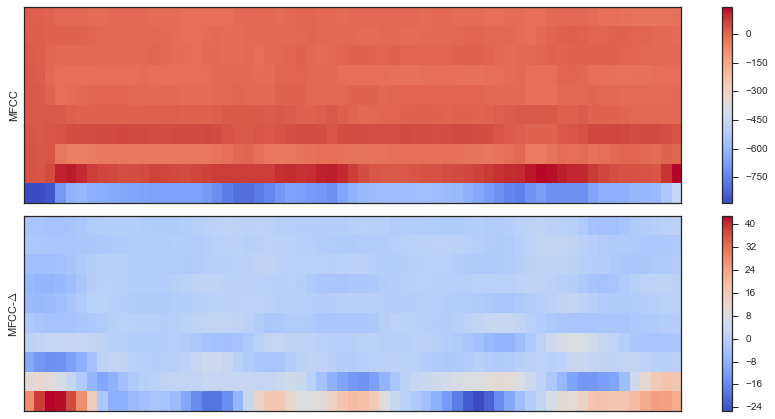

In [106]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=10)

delta_mfcc = librosa.feature.delta(mfcc)

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.tight_layout()

In [107]:
mfcc[0].size

63